<a href="https://colab.research.google.com/github/wiederm/notebooks/blob/main/PlotsForDocking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:39
🔁 Restarting kernel...


In [ ]:
import condacolab
condacolab.check()

✨🍰✨ Everything looks OK!


In [ ]:
!mamba install -c conda-forge seaborn pandas


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (0.8.0) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['seaborn', 'pandas']

conda-forge/linux-64     [] (00m:00s) 
conda-forge/linux-64     [] (00m:00s) 

In [ ]:
systems = ['ABL1', 'AKT1', 'AKT2', 'BRAF', 'CDK2', 'CSF1R', 'EGFR', 'FAK1', 'FGFR1', 'JAK2', 'KIT', 'KPCB', 'LCK', 'MET', 'MK01', 'MK10', 'MK14', 'MP2K1', 'PLK1', 'ROCK1', 'SRC', 'TGFR1', 'VGFR2', 'WEE1']
opls2005_rmsd = [0.534, 0.269, 0.842, 0.726, 1.429, 1.031, 1.707, 2.708, 0.297, 0.922, 0.922, 5.171, 3.731, 1.813, 10.498, 0.5, 10.532, 2.512, 1.749, 4.334, 1.079, 0.534, 0.876, 2.711]
opls3e_rmsd = [0.454, 0.283, 0.401, 0.792, 8.809, 0.98, 1.183, 2.706, 0.316, 1.653, 0.307, 5.207, 0.581, 1.689, 0.495, 0.447, 1.712, 2.287, 1.627, 0.45, 1.077, 0.367, 0.508, 3.009]
assert (len(systems) == len(opls2005_rmsd))
assert (len(systems) == len(opls3e_rmsd))

In [ ]:
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
d = {'OPLS2005' : pd.Series(opls2005_rmsd,),
     'OPLS3e' : pd.Series(opls3e_rmsd)}


df = pd.DataFrame(d)
df

,OPLS2005,OPLS3e
0,0.534,0.454
1,0.269,0.283
2,0.842,0.401
3,0.726,0.792
4,1.429,8.809
5,1.031,0.980
6,1.707,1.183
7,2.708,2.706
8,0.297,0.316
9,0.922,1.653


[]

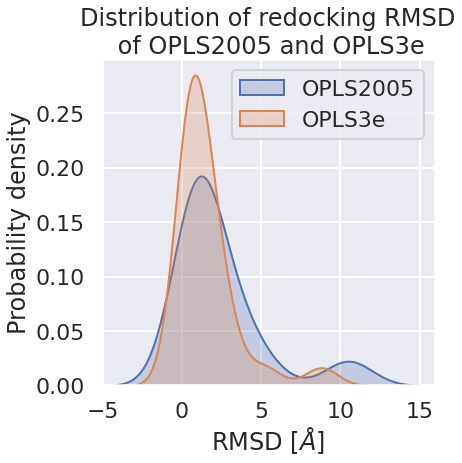

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set_theme()
sns.color_palette("tab10")
sns.set_context("poster")
plt.figure(figsize=(6,6))

sns.kdeplot(opls2005_rmsd, label='OPLS2005', shade=0.2,)
sns.kdeplot(opls3e_rmsd, label='OPLS3e', shade=0.2)


plt.xlabel(r'RMSD [$\AA$]')
plt.ylabel('Probability density')
plt.title('Distribution of redocking RMSD\n of OPLS2005 and OPLS3e')
plt.legend()
plt.plot()

[]

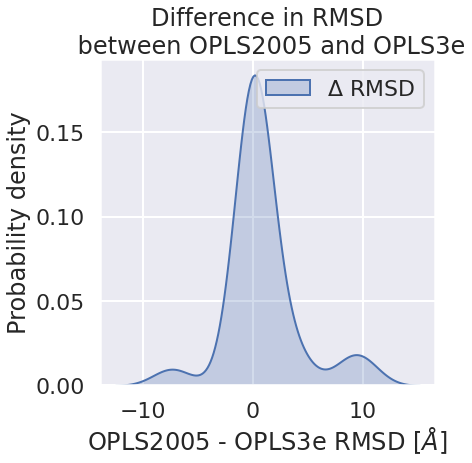

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme()
sns.color_palette("tab10")
sns.set_context("poster")
plt.figure(figsize=(6,6))
sns.kdeplot(np.array(opls2005_rmsd) - np.array(opls3e_rmsd) , shade=0.2, label=r'$\Delta$ RMSD')
plt.xlabel(r'OPLS2005 - OPLS3e RMSD [$\AA$]')
plt.ylabel('Probability density')
plt.title('Difference in RMSD\n between OPLS2005 and OPLS3e')
plt.legend()
plt.plot()

In [ ]:
rmsd_p10 = [0.53, 0.47, 0.34, 0.26, 0.23, 0.32, 0.3, 0.84, 0.84, 0.92, 0.98, 0.8, 4.67, 2.79, 4.66, 0.99, 1.04, 0.98, 2.14, 2.65, 2.08, 2.67, 2.66, 2.66, 0.18, 0.15, 0.14, 8.25, 8.21, 7.48, 0.29, 0.23, 1.61, 0.18, 0.96, 0.94, 5.2, 5.3, 2.75, 0.95, 0.54, 0.46, 1.55, 1.57, 1.31, 0.26, 0.42, 0.39, 0.33, 0.31, 0.23, 1.44, 10.42, 10.49, 2.88, 2.79, 1.96, 1.36, 1.21, 1.82, 0.366, 0.29, 0.28, 1.13, 1.05, 1.16, 0.183, 0.2, 0.23, 2.62, 2.67, 2.55]
rmsd_p08 = [0.8, 0.6, 2.21, 0.46, 0.4, 0.37, 0.35, 0.35, 1.1, 0.93, 0.92, 0.94, 2.78, 2.71, 4.7, 1.68, 1.98, 1.21, 11.09, 11.19, 11.41, 2.82, 1.59, 1.6, 0.75, 0.76, 0.63, 8.46, 8.4, 8.3, 1.99, 1.09, 1.77, 1.1, 0.55, 1.13, 0.93, 5.19, 5.19, 0.85, 0.66, 0.8, 1.74, 1.76, 1.39, 0.71, 5.54, 0.75, 0.7, 0.46, 0.49, 1.88, 10.29, 10.07, 2.87, 2.52, 2.93, 0.86, 1.26, 1.23, 1.2, 	0.54, 0.98, 1.43, 1.4, 1.27, 2.21, 2.16, 0.58, 1.91, 0.87, 0.73]
rmsd_p09 = [2.19, 0.49, 2.11, 0.28, 0.32, 0.3, 0.29, 0.84, 0.8, 0.93, 0.82, 0.9, 2.77, 2.78, 3.96, 1.02, 1.02, 1.68, 11.04, 3.15, 10.96, 2.69, 2.68, 2.68, 0.65, 0.78, 0.76, 8.34, 8.32, 8.3, 1.84, 2.05, 2.07, 1.13, 0.35, 0.34, 5.18, 5.17, 5.28, 0.7, 0.7, 0.71, 1.59, 1.58, 1.57, 0.28, 0.25, 0.38, 0.37, 0.3, 0.33, 10.12, 10.31, 10.42, 2.74, 2.81, 2.85, 1.42, 1.31, 0.83, 1.22, 0.45, 0.42, 0.99, 1.,1.1, 0.37, 0.31, 0.23, 2.59, 2.12, 0.56]

In [ ]:
rmsd_p10_08 = [rmsd_p10[idx] for idx in range(0,len(rmsd_p10),3)]
rmsd_p10_09 = [rmsd_p10[idx] for idx in range(1,len(rmsd_p10),3)]
rmsd_p10_10 = [rmsd_p10[idx] for idx in range(2,len(rmsd_p10),3)]

rmsd_p08_08 = [rmsd_p08[idx] for idx in range(0,len(rmsd_p08),3)]
rmsd_p08_09 = [rmsd_p08[idx] for idx in range(1,len(rmsd_p08),3)]
rmsd_p08_10 = [rmsd_p08[idx] for idx in range(2,len(rmsd_p08),3)]

rmsd_p09_08 = [rmsd_p09[idx] for idx in range(0,len(rmsd_p09),3)]
rmsd_p09_09 = [rmsd_p09[idx] for idx in range(1,len(rmsd_p09),3)]
rmsd_p09_10 = [rmsd_p09[idx] for idx in range(2,len(rmsd_p09),3)]

assert len(rmsd_p10_08) == len(rmsd_p08_08)
assert len(rmsd_p10_08) == len(rmsd_p09_08)

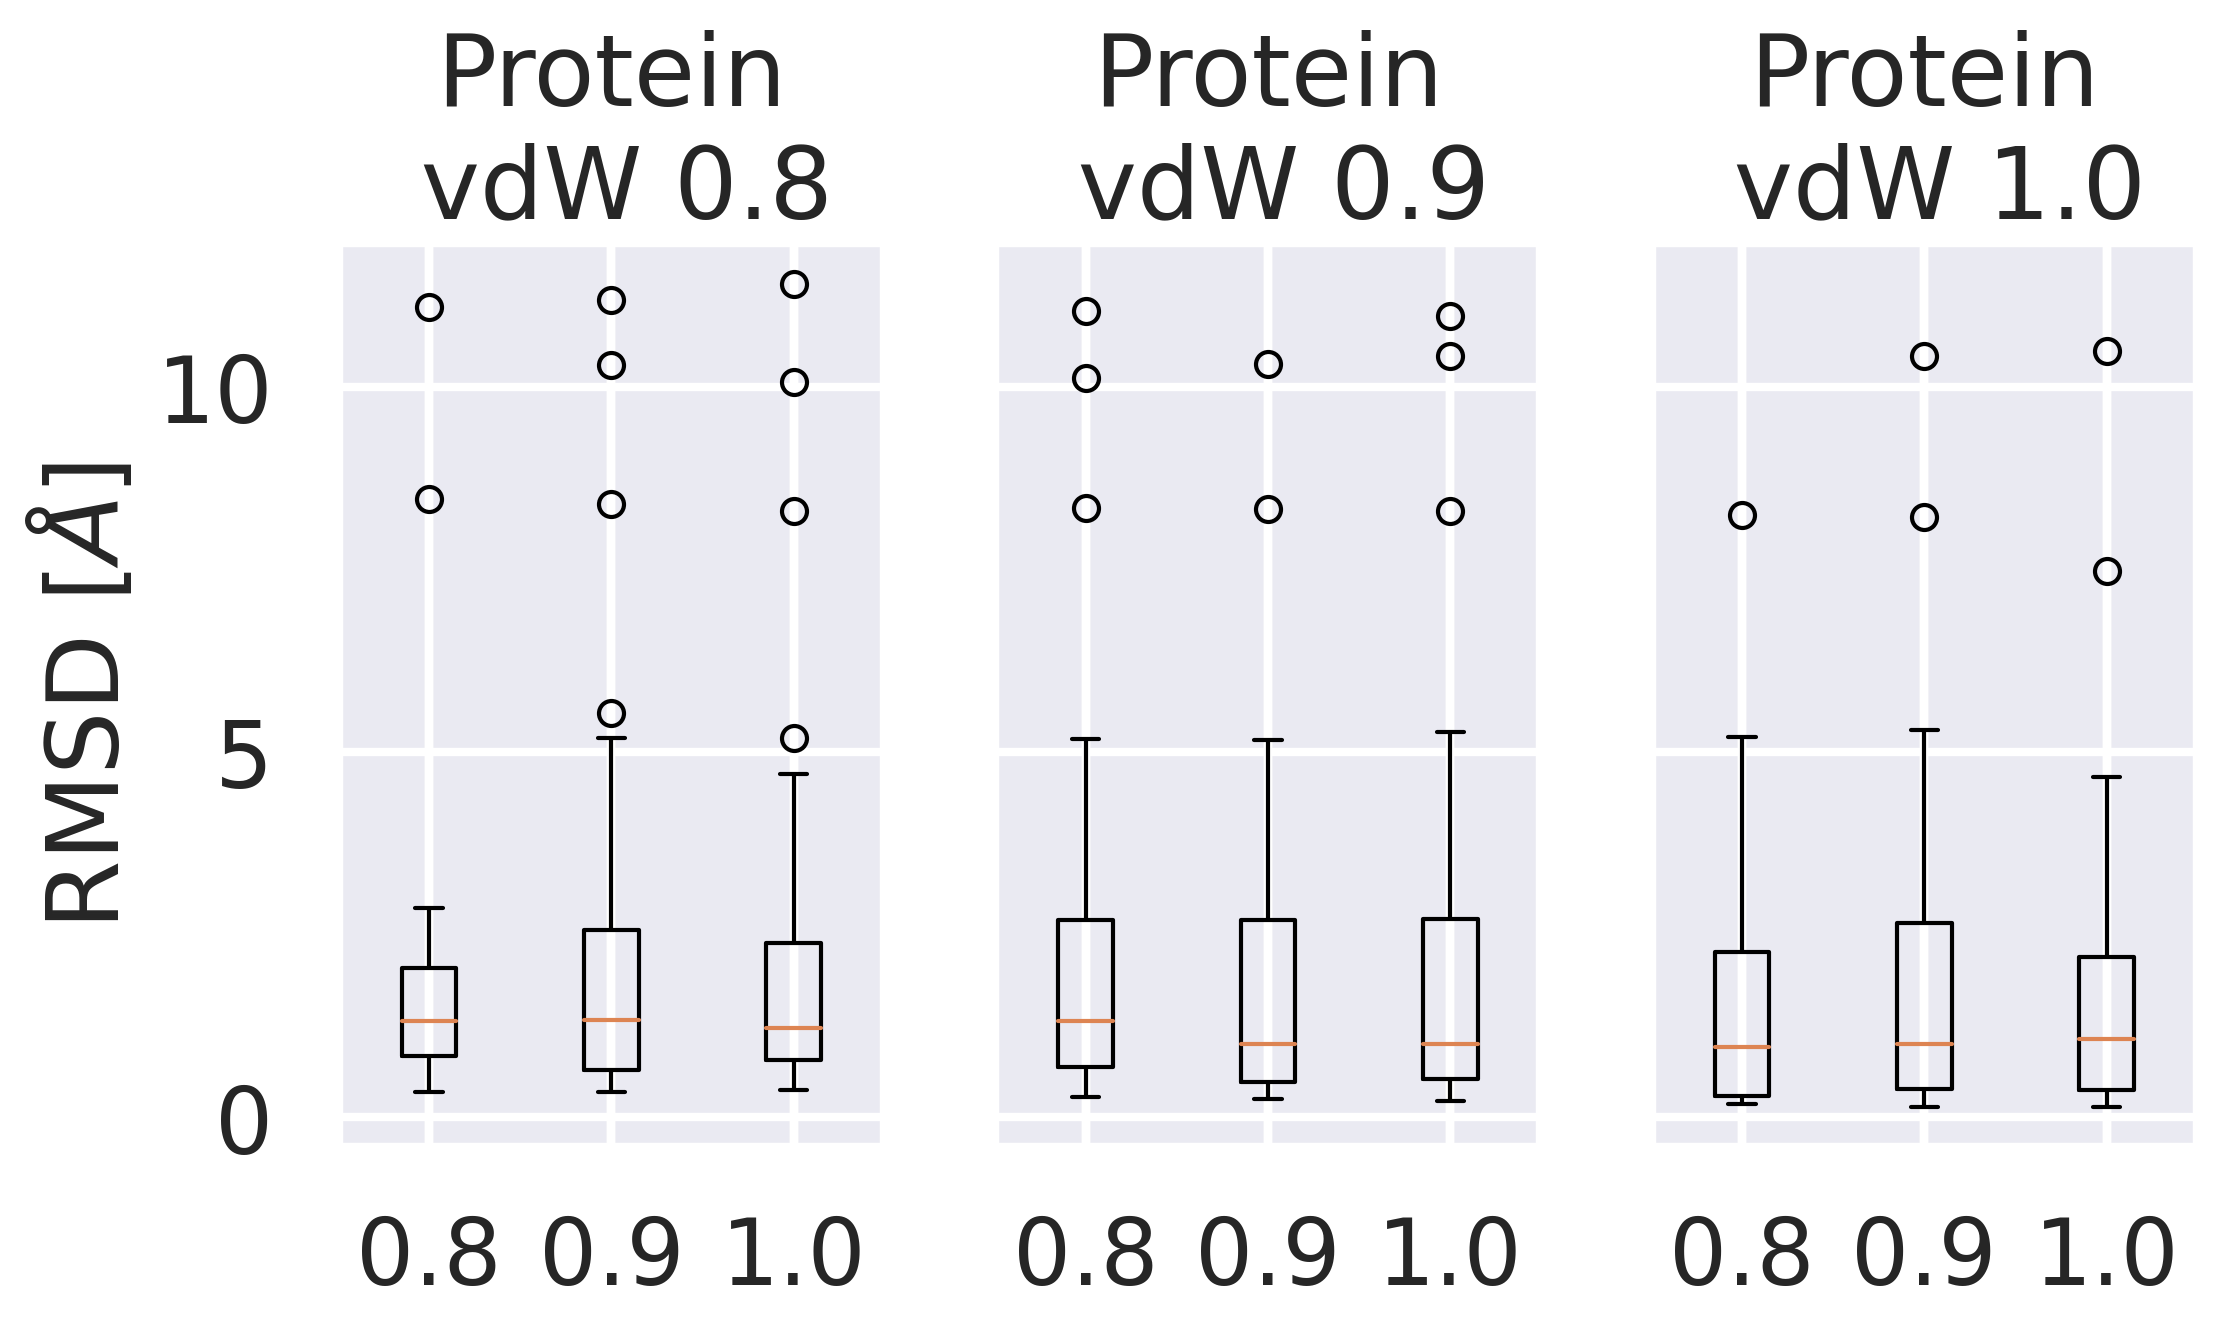

In [ ]:
sns.set_theme()
sns.color_palette("tab10")
sns.set_context("poster")
f, (ax1, ax2, ax3) = plt.subplots(1,3, sharex=True, sharey=True, figsize=[8, 4], dpi=300)

ax1.boxplot([rmsd_p08_08, rmsd_p08_09,rmsd_p08_10])
ax2.boxplot([rmsd_p09_08, rmsd_p09_09,rmsd_p09_10])
ax3.boxplot([rmsd_p10_08, rmsd_p10_09,rmsd_p10_10])

ax1.set_xticklabels(['0.8','0.9','1.0'])
ax1.set_title('Protein\n vdW 0.8')
ax2.set_title('Protein\n vdW 0.9')
ax3.set_title('Protein\n vdW 1.0')
ax1.set_ylabel(r'RMSD [$\AA$]')
#plt.title('Distribution of redocking RMSD values\nfor three vdW ligand scaling factors')
plt.show()

In [ ]:
d_screening = [0.29,1.88,-0.63,-0.97,0.71,-5.47,0.63,1.67,0.52,0.75,0.41,0.14,-0.49,0.17,-0.1,0.6,0.63,-0.06,0.13,-0.23,0.31,-0.45,0.53,0.28]

[]

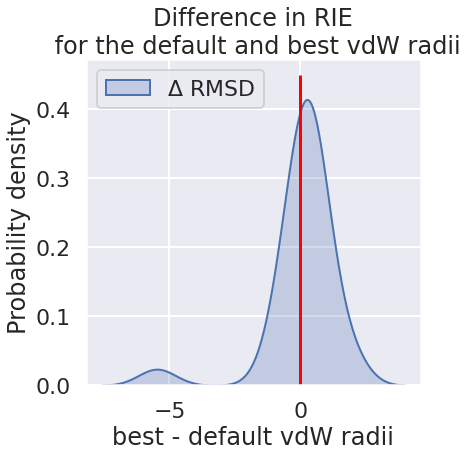

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme()
sns.color_palette("tab10")
sns.set_context("poster")
plt.figure(figsize=(6,6))
sns.kdeplot(d_screening , shade=0.2, label=r'$\Delta$ RMSD')
plt.xlabel(r'best - default vdW radii')
plt.ylabel('Probability density')
plt.title('Difference in RIE\n for the default and best vdW radii')
plt.legend(loc='upper left')
plt.vlines(0, 0,0.45, color='red')
plt.plot()